# **4. ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ**

# Задание 3

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
from pandas import read_csv

In [ ]:
from numpy import set_printoptions

In [ ]:
from sklearn.preprocessing import MinMaxScaler # масштабирует в интервал от 0 до 1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-200')

In [ ]:
filename='pima-indians-diabetes.data.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=read_csv(filename,names=names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**3. Сохраните в переменную array значения признаков, обратившись к атрибуту values.**

In [ ]:
array = data.values
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

**4. Выделите в переменной array часть, которая относится к факторным**

 **признакам, назовите ее X, и часть, которая относится к результативному**

**признаку, - Y. Прокомментируйте содержимое переменных X и Y.**

In [ ]:
X = array[:,0:8] # факторные признаки, т.е. параметры объекта
Y = array[:,8] # результативные признак, т.е. сам объект
# это обучение с учителем х - это данные, y - это ответ

**5. Проведите масштабирование факторных признаков на отрезок [0,1]. Для этого сначала создайте соответствующий объект с помощью функции MinMaxScaler() из модуля sklearn.preprocessing. Потом обучите его на факторных признаках и преобразуйте данные с помощью функции fit_transform().**

In [ ]:
from pandas.core.apply import FrameApply
scaler=MinMaxScaler(feature_range=(0,1)) # feature_range=(0,1) - можно не писать, по умолчанию берется
# создали функцию масштабирования данных в (0,1) и загнали ее в переменную scaler

In [ ]:
rescaledX=scaler.fit_transform(X)
# все наборы признаков масштабировали в от 0 до 1 и записали в переменную rescaledX

In [ ]:
rescaledX[0:5,:] # просмотр данных

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

**6. Установите формат представления данных вида 3 знака после запятой, воспользовавшись функцией set_printoptions() из модуля numpy.**

In [ ]:
set_printoptions(precision=3) # округляем данные до 3-х знаков после запятой

**7. Выведите на экран первые 5 строк преобразованных данных.**

In [ ]:
rescaledX[0:5,:]

array([[0.353, 0.744, 0.59 , 0.354, 0.   , 0.501, 0.234, 0.483],
       [0.059, 0.427, 0.541, 0.293, 0.   , 0.396, 0.117, 0.167],
       [0.471, 0.92 , 0.525, 0.   , 0.   , 0.347, 0.254, 0.183],
       [0.059, 0.447, 0.541, 0.232, 0.111, 0.419, 0.038, 0.   ],
       [0.   , 0.688, 0.328, 0.354, 0.199, 0.642, 0.944, 0.2  ]])

**8. Проведите стандартизацию факторных признаков. Для этого сначала создайте соответствующий объект с помощью функции StandardScaler() из модуля sklearn.preprocessing. Потом обучите его на факторных признаках с помощью функции fit() и преобразуйте данные с помощью функции transform(). Выведите на экран первые 5 строк преобразованных**

факторные признаки - это свойства объекта, унас X

!!!грубо говоря приводим данные к виду, когда среднее =0, а стандартное отклонение = 1

**Т.е. масштаб у всех признаков одинаковый**

In [ ]:
scaler=StandardScaler().fit(X) # создали объект и обучили его

In [ ]:
rescaledX=scaler.transform(X) # делаем среднее =0, а стандартное отклонение = 1

In [ ]:
rescaledX[0:5,:] # форэкзампел

array([[ 0.64 ,  0.848,  0.15 ,  0.907, -0.693,  0.204,  0.468,  1.426],
       [-0.845, -1.123, -0.161,  0.531, -0.693, -0.684, -0.365, -0.191],
       [ 1.234,  1.944, -0.264, -1.288, -0.693, -1.103,  0.604, -0.106],
       [-0.845, -0.998, -0.161,  0.155,  0.123, -0.494, -0.921, -1.042],
       [-1.142,  0.504, -1.505,  0.907,  0.766,  1.41 ,  5.485, -0.02 ]])

**9. Проведите нормализацию факторных признаков. Для этого сначала создайте соответствующий объект с помощью функции Normalizer() из модуля sklearn.preprocessing. Потом обучите его на факторных признаках с помощью функции fit() и преобразуйте данные с помощью функции transform(). Выведите на экран первые 5 строк преобразованных данных.**


отступление:

**Нормализация** подразумевает изменение диапазонов в данных без изменения формы распределения,

**Стандартизация** изменяет форму распределения данных (приводится к нормальному распределению).

# **простое объяснение:**
Обычно достаточно **нормализовать** данные. Например, в глубоком обучении (Deep Learning) требуется перевести цвета изображений RGB из диапазона 0-255 к диапазону 0-1. А вот **стандартизацию** стоит применять при использование алгоритмов, которые основываются на измерении расстояний, например, *k ближайших соседей или метод опорных векторов* (SVM).

In [ ]:
scaler=Normalizer().fit(X) # создаем объект, обучаем

In [ ]:
normalizedX=scaler.transform(X) #  делает данные нормализованными

In [ ]:
normalizedX[0:5,:]

array([[0.034, 0.828, 0.403, 0.196, 0.   , 0.188, 0.004, 0.28 ],
       [0.008, 0.716, 0.556, 0.244, 0.   , 0.224, 0.003, 0.261],
       [0.04 , 0.924, 0.323, 0.   , 0.   , 0.118, 0.003, 0.162],
       [0.007, 0.588, 0.436, 0.152, 0.622, 0.186, 0.001, 0.139],
       [0.   , 0.596, 0.174, 0.152, 0.731, 0.188, 0.01 , 0.144]])

**10. Проведите бинарное кодирование факторных признаков так, чтобы значение признака, большее 0, стало равным 1. Для этого сначала создайте соответствующий объект с помощью функции Binarizer(threshold=0.0) из модуля sklearn.preprocessing. Потом обучите его на факторных признаках с помощью функции fit() и преобразуйте данные с помощью функции transform(). Выведите на экран первые 5 строк преобразованных данных.**


In [ ]:
binarizer=Binarizer(threshold=0.0).fit(X) # создаем и обучаем объект

In [ ]:
binaryX=binarizer.transform(X) # преобразуем в бинарный вид

In [ ]:
binaryX[0:5,:]

array([[1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.]])

# **4. ОТБОР ПРИЗНАКОВ**

**11. Проведите отбор 4 наиболее значимых признаков на основе F-критерия в дисперсионном анализе. Для этого сначала создайте соответствующий объект с помощью функции SelectKBest(score_func=f_classif, k=4) из модуля sklearn.feature_selection. Потом обучите его на переменных X и Y с помощью функции fit(). Выведите на экран значения F-критерия для всех признаков, обратившись**

Проще говоря:
**f-критерий** - сравнивает 2 объекта по одному признаку (столбцу) и чем этот критерий выше, тем больше различие признаков

т.е. в этом задании мы из 8 признаков выбираеи 4 признака, которые будут иметь максимальный f-критерий, находим 4 признака, которые **max** будут различать объекты

In [ ]:
test=SelectKBest(score_func=f_classif, k=4) # создание объекта

In [ ]:
fit=test.fit(X,Y) # обучаем объект

In [ ]:
fit.scores_ # выводим f-критерии, чем тольше значение, тем больше различие признаков

array([ 39.67 , 213.162,   3.257,   4.304,  13.281,  71.772,  23.871,
        46.141])

**12. Преобразуйте факторные признаки с помощью функции transform(). Выведите на экран первые 5 строк преобразованных данных.**


In [ ]:
features=fit.transform(X) # вытаскивает из набора те признаки для которых f-критерии максимальные,
                          # ранее мы задали их 4 штуки

In [ ]:
features[0:5,:]

array([[  6. , 148. ,  33.6,  50. ],
       [  1. ,  85. ,  26.6,  31. ],
       [  8. , 183. ,  23.3,  32. ],
       [  1. ,  89. ,  28.1,  21. ],
       [  0. , 137. ,  43.1,  33. ]])

**13. Проводите рекурсивное исключение наименее значимых признаков до тех пор, пока не останется 3 признака. Отбор осуществляйте на основе модели логистической регрессии. Сначала создайте модель с помощью функции LogisticRegression() из модуля sklearn.linear_model.**


In [ ]:
model=LogisticRegression(solver='liblinear') # алгоритм оптимизации(создание объекта для модели регрессии)

**14. Затем с помощью функции RFE() из модуля sklearn.feature_selection создайте объект для рекурсивного исключения признаков, подав ему на вход созданную модель логистической регрессии и количество отбираемых признаков (n_features_to_select=3).**


In [ ]:
rfe=RFE(model,n_features_to_select=3)

**15. Обучите созданный объект на переменных X и Y с помощью функции fit().**


In [ ]:
fit=rfe.fit(X,Y)

**16. Выведите на экран число отобранных признаков, обратившись к параметру n_features_.**


In [ ]:
fit.n_features_

3

**17. Выведите на экран логическое указание на отобранные признаки из всего набора, обратившись к параметру support_.**

In [ ]:
fit.support_ # определяет 3 наиболее значимых признака в бинарной форме

array([ True, False, False, False, False,  True,  True, False])

**18. Выведите на экран ранги признаков, обратившись к параметру ranking_.**


In [ ]:
fit.ranking_ # указывает признаки по значимости

array([1, 2, 3, 5, 6, 1, 1, 4])

**19. Проведите отбор 3-х главных компонент. Для этого сначала создайте соответствующий объект с помощью функции PCA(n_components=3) из модуля sklearn.decomposition.**


In [ ]:
rfe.fit_transform(X,Y) # выводим 3 главных признака, т.е. признааки в которых f-критерий максимален

array([[ 6.   , 33.6  ,  0.627],
       [ 1.   , 26.6  ,  0.351],
       [ 8.   , 23.3  ,  0.672],
       ...,
       [ 5.   , 26.2  ,  0.245],
       [ 1.   , 30.1  ,  0.349],
       [ 1.   , 30.4  ,  0.315]])

In [ ]:
pca=PCA(n_components=3) # создаем объект

**20. Обучите его на факторных признаках с помощью функции fit().**


In [ ]:
fit=pca.fit(X)

**21. Выведите на экран долю объясненной 3-мя компонентами дисперсии, обратившись к параметру explained_variance_ratio_.**


**!!!** сначала идут компоненты с наибольшой диспперсией

In [ ]:
fit.explained_variance_ratio_ # вывод: основная первая компонента, ее достаточно

array([0.889, 0.062, 0.026])

**22. Выведите на экран главные компонентные нагрузки, обратившись к параметру components_.**


**компонентные нагрузки** - это коэффициент корреляции между признаками и главными компонентами(ответами)

In [ ]:
fit.components_

array([[-2.022e-03,  9.781e-02,  1.609e-02,  6.076e-02,  9.931e-01,
         1.401e-02,  5.372e-04, -3.565e-03],
       [-2.265e-02, -9.722e-01, -1.419e-01,  5.786e-02,  9.463e-02,
        -4.697e-02, -8.168e-04, -1.402e-01],
       [-2.246e-02,  1.434e-01, -9.225e-01, -3.070e-01,  2.098e-02,
        -1.324e-01, -6.400e-04, -1.255e-01]])

In [ ]:
pca.fit_transform(X) # переводит среднее в 0? штоли

array([[-75.715, -35.951,  -7.261],
       [-82.358,  28.908,  -5.497],
       [-74.631, -67.906,  19.462],
       ...,
       [ 32.113,   3.377,  -1.588],
       [-80.214, -14.186,  12.351],
       [-81.308,  21.621,  -8.153]])

**23. Примените классификатор дополнительных деревьев для отбора признаков, воспользовавшись встроенным в них механизмом расчета критериев информативности при поиске, по какому признаку осуществлять разбиение. Для этого сначала создайте соответствующий объект с помощью функции ExtraTreesClassifier(n_estimators=100) из модуля sklearn.ensemble.**

In [ ]:
model=ExtraTreesClassifier(n_estimators=100)

**24. Обучите его на переменных X и Y с помощью функции fit().**


In [ ]:
model.fit(X,Y)

ExtraTreesClassifier()

**25. Выведите на экран значения критерия информативности для каждого признака, обратившись к параметру feature_importances_.**


In [ ]:
model.feature_importances_

array([0.108, 0.227, 0.1  , 0.08 , 0.074, 0.143, 0.12 , 0.147])

# Задание 4

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 473 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=925bd04c3037b6811e702135796a5d439d620adb996b90bba76aa7df9cd3dfe5
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


**2 метода понижения размерности:**
1. компонентный метод и
2. факторный анализ

!!! сначала применяем 1., а потом 2.

In [ ]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

**1. Укажите путь к рабочей папке, где хранятся данные, с помощью функции chdir() из модуля os.**


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-200')

**2. Загрузите данные файла stickleback.csv с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
df=pd.read_csv('stickleback.csv',sep=';',decimal=',')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3. Очистите данные от шума с помощью функции filter(regex='^(?!.*Unnamed).*$'). Посмотрите на первые 5 наблюдений с помощью функции head().**

In [ ]:
df=df.filter(regex='^(?!.*Unnamed).*$') # очистка от столбцов 'unnamed'
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


**4. Посмотрите на описательные статистики с помощью функции describe(). Прокомментируйте результат.**

In [ ]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LUNGES   54 non-null     float64
 1   BITES    54 non-null     float64
 2   ZIGZAGS  54 non-null     float64
 3   NEST     54 non-null     float64
 4   SPINES   54 non-null     float64
 5   DNEST    54 non-null     float64
 6   BOUT     54 non-null     float64
dtypes: float64(7)
memory usage: 3.1 KB


**5. Выведите на экран корреляционную матрицу с помощью функции corr(). Прокомментируйте результат.**

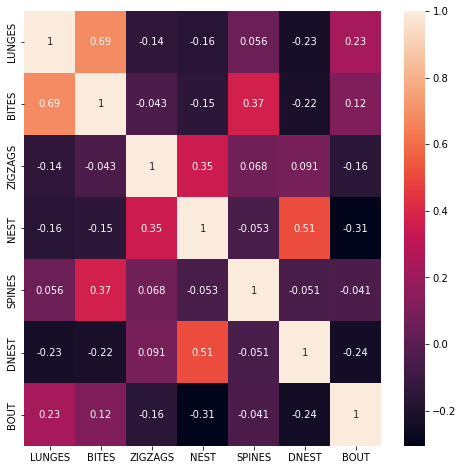

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

**6. Выведите на экран диаграмму рассеяния с помощью функции scatter_matrix() из модуля pandas.plotting. Сделайте вывод о нормальности распределения признаков, о наличии взаимосвязей между ними.**

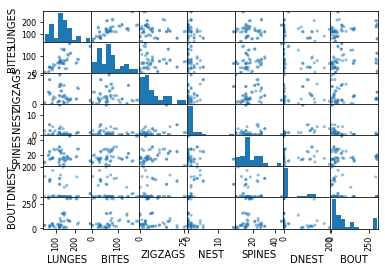

In [ ]:
scatter_matrix(df);

**7. Рассчитайте критерий сферичности Бартлетта с помощью функции calculate_bartlett_sphericity() из модуля factor_analyzer пакета factor_analyzer. Сделайте вывод о надежности отличия корреляционной матрицы от единичной.**

факторный анализ возможен если:
1. наблюдается высокая корреляция

In [ ]:
# находит хи квадрат и p-value
chi,p_value=calculate_bartlett_sphericity(df)
chi,p_value

# p-value - очень мал, поэтому нулевую гипотезу о равенстве нашей матрицы и единичной
# мы отвергаем и это говорит о том что наша матрица сильно отличается от нулевой
# значит признаки всетаки взаимосвязаны

(85.17614839099767, 1.0820712955339398e-09)

**8. Рассчитайте меру адекватности выборки Кайзера-Мейера-Олкина индивидуально для каждой переменной (kmo_all) и в целом для модели (kmo_model) с помощью функции calculate_kmo() из модуля factor_analyzer пакета factor_analyzer. Прокомментируйте результат.**

In [ ]:
kmo_all, kmo_model = calculate_kmo(df)

In [ ]:
kmo_model

0.5267816347722194

In [ ]:
kmo_all # метод позволяет отбросить наименее значимые признаки
# что больше 0.5, то подходит

array([0.495, 0.486, 0.537, 0.573, 0.338, 0.616, 0.761])

# **Раздел 2. Выделение первоначальных факторов методом главных компонент**


**9. Стандартизируйте переменные с помощью функции scale() из модуля preprocessing пакета sklearn. Посмотрите на первые 5 наблюдений.**

In [ ]:
df_scaled=preprocessing.scale(df)

In [ ]:
df_scaled[0:5,:]

array([[-1.038, -1.024, -1.097, -0.48 , -0.397, -0.612, -0.453],
       [ 0.096, -0.257, -0.193, -0.48 , -0.397, -0.612,  0.6  ],
       [-0.322, -0.908, -0.796, -0.143, -1.092, -0.523, -0.617],
       [-0.043,  1.626,  1.315, -0.48 ,  0.414, -0.612, -0.208],
       [-0.222, -0.257,  1.164,  4.566, -0.513,  0.853, -0.822]])

**10. Создайте объект метода главных компонент с помощью функции PCA(). Задайте при этом число компонент, равное числу признаков.**

In [ ]:
pca=PCA(n_components=7)

**11. Обучите объект на стандартизированных данных, воспользовавшись функцией fit().**

In [ ]:
pca.fit(df_scaled)

PCA(n_components=7)

**12. Попробуйте отобрать компоненты, используя критерий Кайзера. Собственные числа можно вывести на экран, обратившись к параметру explained_variance_. Прокомментируйте результат.**

In [ ]:
pca.explained_variance_ # все > 1, поэтому можно оставить

array([2.331, 1.482, 0.998, 0.903, 0.767, 0.412, 0.239])

**13. Воспользуйтесь методом определения числа факторов на основе суммарной доли объясненной дисперсии. Объясненную дисперсию можно вывести на экран, обратившись к параметру explained_variance_ratio_. Прокомментируйте результат.**

In [ ]:
pca.explained_variance_ratio_
# возьмем первые 3 фактора,  которые охватывают гдето 65% факторов

array([0.327, 0.208, 0.14 , 0.127, 0.108, 0.058, 0.033])

Раздел 3. Факторный анализ
# **Текст, выделенный полужирным шрифтом**

In [ ]:
pca=PCA(n_components=3) # блок можно не делать
pca.fit(df_scaled)

PCA(n_components=3)

In [ ]:
v=0
for i in pca.explained_variance_ratio_:
  v+=i
  print(v)

0.3268773917679257
0.5346261250218028
0.6744995808365255
0.8010823391610432
0.9086880347421142
0.9665177682091353
0.9999999999999999


**15. Создайте модель для проведения факторного анализа, воспользовавшись функцией FactorAnalyzer() из пакета factor_analyzer.**

In [ ]:
fa=FactorAnalyzer()

**16. Обучите модель на стандартизированных данных, воспользовавшись функцией fit().**


In [ ]:
fa.fit(df_scaled)

FactorAnalyzer(rotation_kwargs={})

**17. На основе созданной модели вычислите собственные числа (eigen_values) и собственные вектора (vectors), обратившись к функции get_eigenvalues().**


In [ ]:
pd.DataFrame(fa.components_,columns=df.columns)

In [ ]:
eigen_values,vectors=fa.get_eigenvalues()
eigen_values

array([2.288, 1.454, 0.979, 0.886, 0.753, 0.405, 0.234])

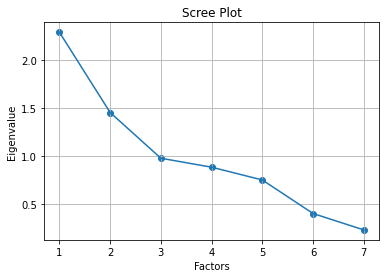

In [ ]:
plt.scatter(range(1,df_scaled.shape[1]+1),eigen_values)
plt.plot(range(1,df_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa.set_params(n_factors= 3, rotation='varimax')

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
fa.fit(df_scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

**26. Рассчитайте значения факторов на основе стандартизированных данных, воспользовавшись функцией fit_transform(). Результат представьте в виде таблицы, в названии столбцов которой содержится указание на номер фактора. Выведите на экран первые 5 строк.**

# ***!!! Факторный анализ применяем когда хотим изменить размерность, когда много признаков***

In [ ]:
loadings=pd.DataFrame(fa.loadings_,columns=['factor_1','factor_2','factor_3'],index=df.columns)
loadings
# расчет значений 3-х факторов

,factor_1,factor_2,factor_3
LUNGES,0.020596,0.923369,-0.088005
BITES,0.025510,0.725449,0.506470
ZIGZAGS,0.333253,-0.025142,0.102150
NEST,1.098768,0.294280,-0.207674
SPINES,-0.023654,-0.002614,0.569932
DNEST,0.514111,-0.028053,-0.123253
BOUT,-0.322658,0.140623,-0.098515


In [ ]:
fa.set_params(n_factors= 2, rotation='varimax')

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [ ]:
fa.fit(df_scaled)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [ ]:
loadings=pd.DataFrame(fa.loadings_,columns=['factor_1','factor_2'],index=df.columns)
loadings

,factor_1,factor_2
LUNGES,0.623123,-0.242540
BITES,1.007741,-0.128163
ZIGZAGS,0.000196,0.355506
NEST,-0.015454,0.894196
SPINES,0.294315,0.018574
DNEST,-0.155512,0.536576
BOUT,0.099458,-0.384636


In [ ]:
fa.get_communalities()

array([0.447, 1.032, 0.126, 0.8  , 0.087, 0.312, 0.158])

In [ ]:
fa.get_uniquenesses()

array([ 0.553, -0.032,  0.874,  0.2  ,  0.913,  0.688,  0.842])

In [ ]:
fa.get_communalities()+fa.get_uniquenesses()

array([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
var=pd.DataFrame(fa.get_factor_variance(),columns=['factor_1','factor_2'],index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
var

,factor_1,factor_2
SS Loadings,1.524760,1.437427
Proportion Var,0.217823,0.205347
Cumulative Var,0.217823,0.423170


In [ ]:
scores=pd.DataFrame(fa.fit_transform(df_scaled),columns=['factor_1','factor_2'])
scores.head()

,factor_1,factor_2
0,-1.056267,-0.414067
1,-0.312892,-0.554501
2,-0.914928,-0.217825
3,1.815168,-0.179745
4,0.413355,3.843151


In [ ]:
scores.corr()

,factor_1,factor_2
factor_1,1.000000,-0.004571
factor_2,-0.004571,1.000000
